# Project Objective

The goal of this project is to predict air quality for a given day by comparing two Machine Learning models: Decision Trees and Multiple Linear Regression.

To achieve this, the project follows these steps:

* Exploratory Data Analysis (EDA) – Understanding the dataset, visualizing patterns, and preprocessing the data.

* Model Training – Implementing and training both Decision Trees and Multiple Linear Regression models.

* Evaluation and Analysis – Comparing the performance of both models using appropriate metrics and analyzing the results.

By the end of the project, we aim to determine which model provides the most accurate air quality predictions.

The first step is to download the repository. We also load the libraries we will need and we load the dataset.

In [ ]:
pip install ucimlrepo

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # MinMaxScaler
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error, root_mean_squared_log_error

In [ ]:
## load the dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

# metadata
print(air_quality.metadata)

# variable information
print(air_quality.variables)


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

In [ ]:
# print the first 10 rows of the dataset
X.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,3/10/2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,3/11/2004,0:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,3/11/2004,1:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702
8,3/11/2004,2:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,3/11/2004,3:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


In [ ]:
# instances of the dataset
instancias = X.shape[0]

print(f"Dataset has got {instancias} instances.")

Dataset has got 9357 instances.


In [ ]:
# Data type of the columns of the dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


According to the last two code cells: .head() and the .info() variables, we can describe the variables:


**Variable name** -> **Description** - **Type** (Nota si la hubiera)

**Date** -> Date, format: DD/MM/AAAA - Object

**Time** -> Object: Date (hour), format: HH:MM:SS (Although the truth is that it refers to the 24 hours of the day, so it could be taken as categorical.)

**CO(GT)** -> Float

**PT08.S1(CO)** -> Integer

**NMHC(GT)** -> Integer

**C6H6(GT)** -> Float

**PT08.S2(NMHC)** -> Integer

**NOx(GT)**	-> Integer

**PT08.S3(NOx)** -> Integer

**NO2(GT)**	-> Integer

**PT08.S4(NO2)** -> Integer

**PT08.S5(O3)**	-> Integer

**T** -> Float

**RH** -> Float

**AH** -> Float

In [ ]:
# What about the categorical/numerical variables?
X.info()
X.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


,0
Date,391
Time,24
CO(GT),97
PT08.S1(CO),1042
NMHC(GT),430
C6H6(GT),408
PT08.S2(NMHC),1246
NOx(GT),926
PT08.S3(NOx),1222
NO2(GT),284


* Which variables are categorical?
It is clear that Date and Time do not provide numerical data, so they are categorical variables.

* Which variables are continuous?
The remaining variables are continuous: despite the dataset information indicating that PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), and PT08.S5(O3) are categorical, they actually represent averages of different gases. Therefore, all variables are continuous except for Date and Time.

In [ ]:
# Are there any missing values in the dataset?
X = X.replace(-200, np.nan)

nulos = X.isnull().sum()
nulos

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


There are missing values. According to the dataset description, missing values are represented by -200. Using Pandas, we replace these values with "NaN". It appears that several observations have lost multiple features (except for Date and Time).

In the dataset documentation, we can read:
"As regard as benzene-NMHC coefficient, it should be noted that it has been computed using only the first 8 days of measurements, after which the NMHC targeted analyser went out of service."

This means that the variable NMHC(GT) stopped recording measurements after the first eight days. We need to decide what to do with this variable (especially if it were to be used as the target), as 90% of its values are missing. We will not use it, and since the dataset is not too small, we will proceed by removing this variable.

Missing values are also significant in other potential target variables (CO(GT), NOx(GT), NO2(GT)) compared to Benzene (C6H6(GT)) and the rest of the dataset (366 missing values).

In [ ]:
# Delete the "NMHC(GT)" column
X = X.drop(["NMHC(GT)"], axis=1)

# For the remaining variables, we impute by the immediate previous value
X = X.ffill()

# Check if there are any missing values left in the dataset
print(X.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


The rest of the variables have far fewer missing values. Additionally, after a quick look at the dataset, these missing values are distributed throughout the entire dataset.

Given the nature of the dataset, where data is collected every hour, it makes sense to impute missing values using the previous value, as variations are expected to be relatively stable. And even if they were volatile, the effect would be mitigated over the course of the year.

In [ ]:
## What is the target variable?
y = X["NO2(GT)"]

According to the previously mentioned study (Vito et al. (2008)), the response variable is Benzene: C6H6 (GT), or at least that is the main focus.

"The overall work was targeted at the estimation of CO, NOx, NO2 and benzene concentrations. Here, we focus on reporting benzene..."

The other possible options would be CO, NOx, and NO2, although we have already discarded NMHC due to the high amount of missing data.

Which variable should we choose?
If we refer to the Spanish government's website on air quality measurement ([Air Quality and Environmental Assessment] (https://www.miteco.gob.es/es/calidad-y-evaluacion-ambiental/temas/atmosfera-y-calidad-del-aire/calidad-del-aire/ica.html)), they consider CO, NOx, and NO2 as key indicators for air quality—not benzene.

This is not an easy decision. However, as mentioned earlier, the amount of missing data is significantly higher for CO, NOx, and NO2 than for benzene.

Therefore, while all these variables could be used as response variables, I am inclined to choose NO2 after a quick review of the available information on the official website.

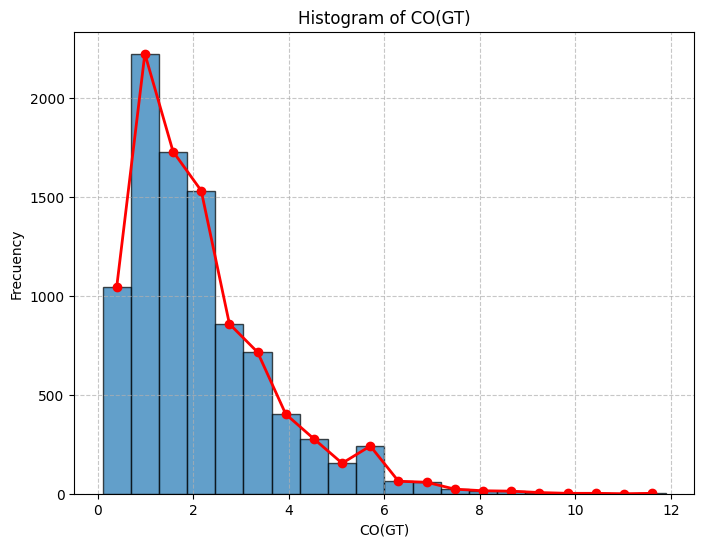

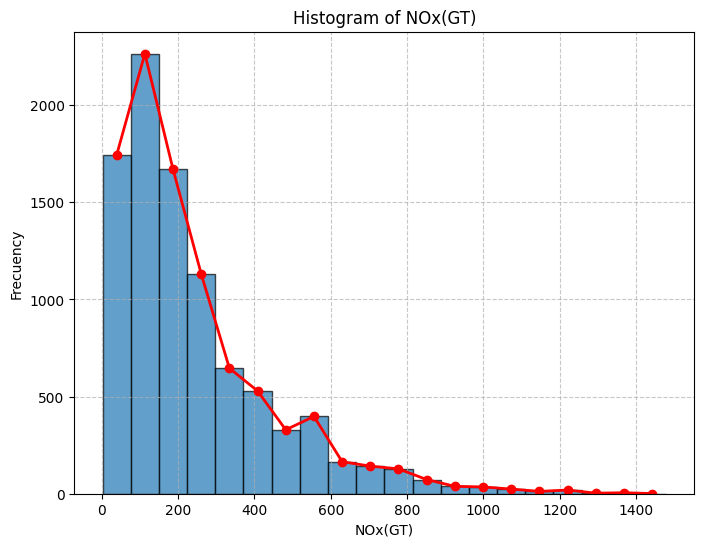

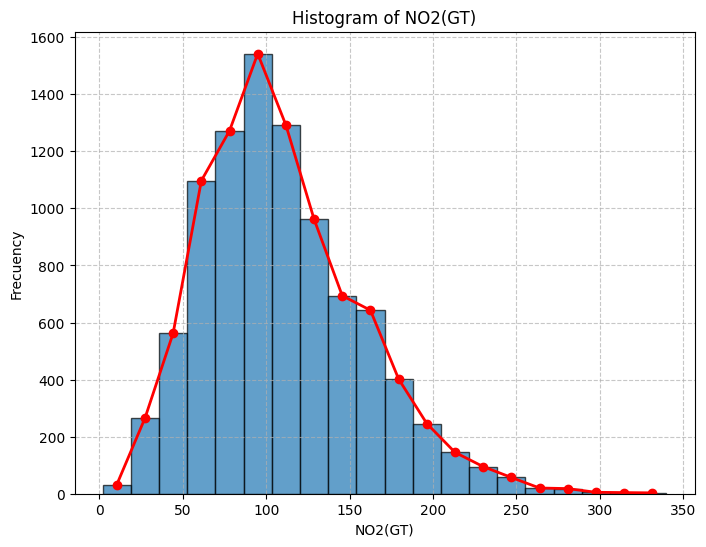

In [ ]:
## What is the distribution of the following variables?
# CO(GT), NOx(GT) and NO2(GT)
given_variables = ["CO(GT)", "NOx(GT)", "NO2(GT)"]


for column in given_variables:
    plt.figure(figsize=(8, 6))  # Size
    counts, bin_edges, _ = plt.hist(X[column], bins=20, edgecolor='k', alpha=0.7, label='Frequency')
    # Compute bin centers for the line plot
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Draw the line of the histogram
    plt.plot(bin_centers, counts, marker='o', color='red', label='Conexión de barras', lw=2)

    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


Do these variables show any special distribution? Do they have missing data? And anomalous data?

Of course, they have missing data. These have been addressed earlier.

Now, let's break it down:

i. CO(GT) distribution: It has a skewed distribution to the right with a very long tail. It seems to have anomalous values.

ii. NOx(GT) distribution: It has an even more asymmetric distribution than the previous one, also skewed to the right. The tail is even longer.

iii. NO2(GT) distribution: It has a normal (or Gaussian) distribution with a mean close to 100. The right tail is long, so it may contain anomalous values.

To check for anomalous values, we use interquartile ranges (IQR 1.5) and boxplots.


Variable: CO(GT)
Outliers: 403
Inf limit: 0, Sup limit: 5.5


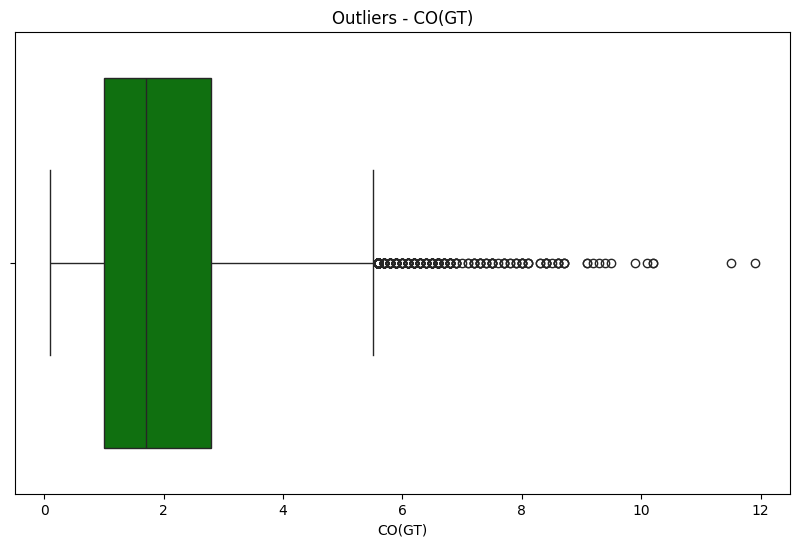


Variable: NOx(GT)
Outliers: 510
Inf limit: 0, Sup limit: 649.5


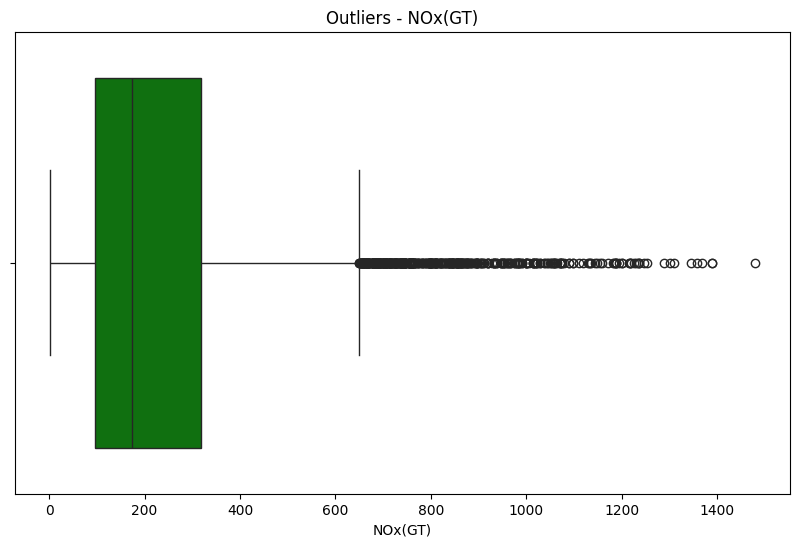


Variable: NO2(GT)
Outliers: 123
Inf limit: 0, Sup limit: 233.0


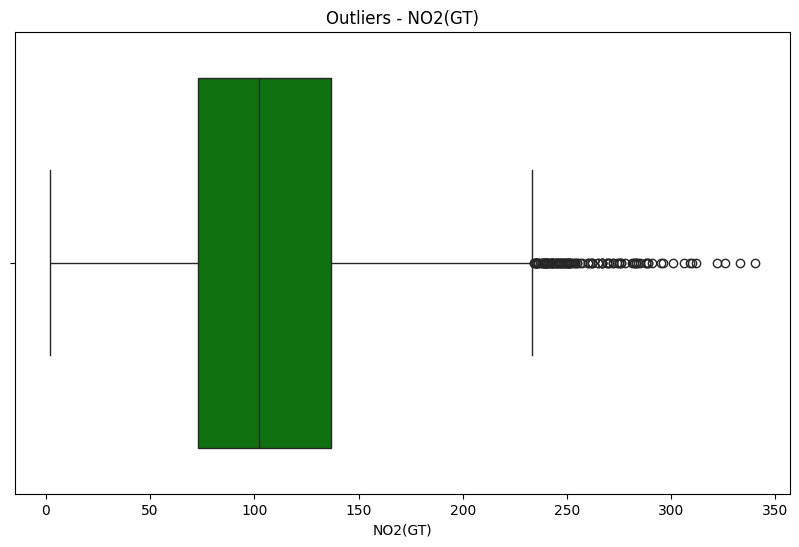

In [ ]:
for var in given_variables:
    Q1 = X[var].quantile(0.25)
    Q3 = X[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, 0) # Inf limit cannot be negative
    upper_bound = Q3 + 1.5 * IQR
    outliers = X[(X[var] < lower_bound) | (X[var] > upper_bound)]
    print(f"\nVariable: {var}")
    print(f"Outliers: {len(outliers)}")
    print(f"Inf limit: {lower_bound}, Sup limit: {upper_bound}")

    # Visualización
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=X[var], color="green")
    plt.title(f"Outliers - {var}")
    plt.xlabel(var)
    plt.show()

Should we remove the anomalous data? This is the question we need to try to answer now.

The answer is no. While we could argue that the linear model will likely perform worse due to its sensitivity to extreme values, these values represent peaks in pollution (all of them are to the right of the "whisker"). This is exactly the purpose of our study: to try to predict the ICA value for a specific day. Removing them would make us lose valuable information.

At the same time, the other model proposed in this study, the decision tree, is a very robust model against extreme values, so not removing these observations would not significantly affect the model.


In [ ]:
## Is there any correlation between the variables?
matriz_corr = X.corr(numeric_only=True)

# Show the correlation matrix
matriz_corr

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.763247,0.779056,0.769081,0.787863,-0.620435,0.693676,0.512432,0.736989,0.001516,0.041975,0.023296
PT08.S1(CO),0.763247,1.000000,0.886325,0.896015,0.644520,-0.777913,0.580919,0.676413,0.901460,0.037046,0.120042,0.121724
C6H6(GT),0.779056,0.886325,1.000000,0.982485,0.637626,-0.737702,0.537442,0.756328,0.861688,0.189645,-0.054949,0.155825
PT08.S2(NMHC),0.769081,0.896015,0.982485,1.000000,0.626594,-0.798121,0.566391,0.769786,0.876588,0.231083,-0.082087,0.174921
NOx(GT),0.787863,0.644520,0.637626,0.626594,1.000000,-0.608068,0.763889,0.194420,0.708762,-0.244068,0.184418,-0.142447
PT08.S3(NOx),-0.620435,-0.777913,-0.737702,-0.798121,-0.608068,1.000000,-0.592228,-0.535264,-0.795958,-0.132851,-0.060581,-0.216738
NO2(GT),0.693676,0.580919,0.537442,0.566391,0.763889,-0.592228,1.000000,0.107057,0.633563,-0.194537,-0.098619,-0.338924
PT08.S4(NO2),0.512432,0.676413,0.756328,0.769786,0.194420,-0.535264,0.107057,1.000000,0.579192,0.558374,-0.015158,0.630272
PT08.S5(O3),0.736989,0.901460,0.861688,0.876588,0.708762,-0.795958,0.633563,0.579192,1.000000,-0.044829,0.137821,0.055483
T,0.001516,0.037046,0.189645,0.231083,-0.244068,-0.132851,-0.194537,0.558374,-0.044829,1.000000,-0.570775,0.654768


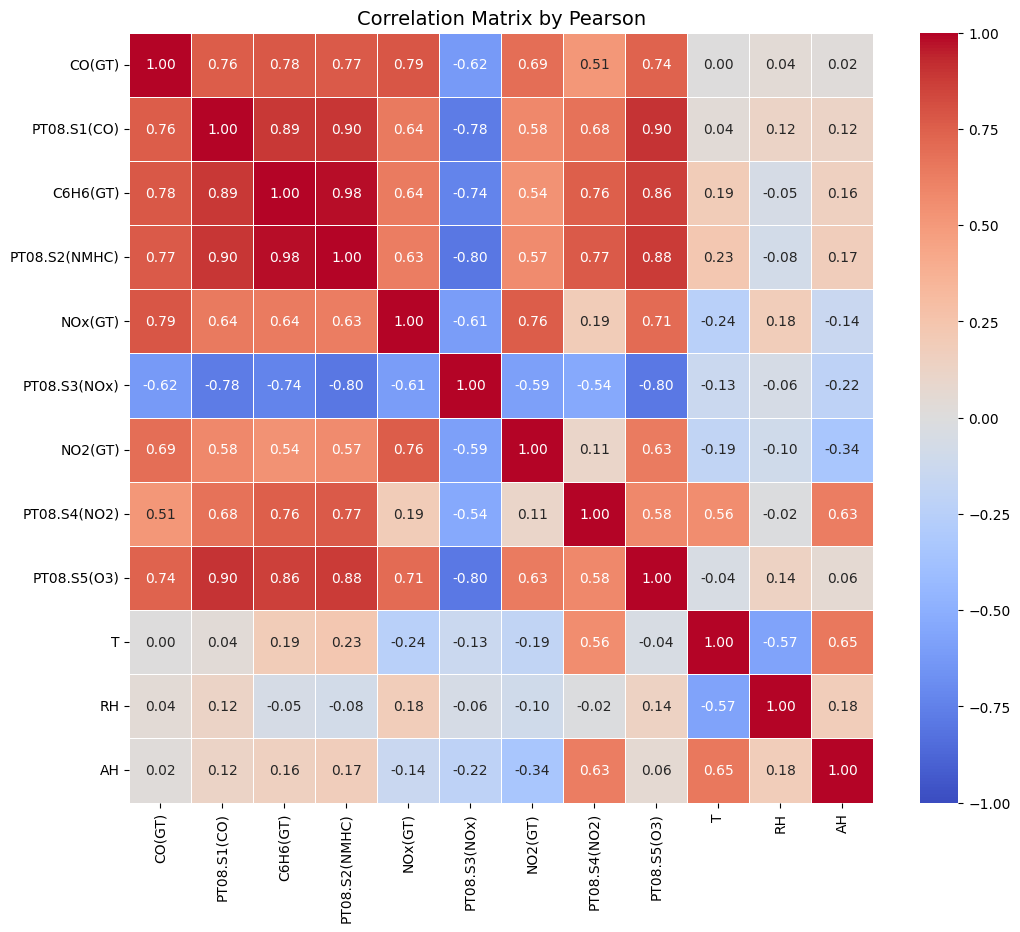

In [ ]:
numeric_variables = X.drop(columns=["Date", "Time"])
correlation_matrix = numeric_variables.corr()
correlation_matrix

# Show the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            linewidths=0.5, annot_kws={"size": 10}, vmin=-1, vmax=1)

plt.title("Correlation Matrix by Pearson", fontsize=14)
plt.show()


We observe that there are pairs with very strong correlations, such as:

i. C6H6(GT) and PT08.S2(NMHC), PT08.S1(CO) and PT08.S5(O3), CO(GT) and PT08.S1(CO), all of which show positive correlations.

ii. PT08.S3(NOx) with PT08.S2(NMHC), PT08.S3(NOx) with PT08.S5(O3), PT08.S3(NOx) with PT08.S1(CO), all of which show negative correlations.

There are also variables that show very weak correlations with all others, such as Relative Humidity (RH) and Absolute Humidity (AH) (except with Temperature (T)).

On the other hand, all the indicators and pollution sensors that measure ozone, carbon monoxide, etc., are positively correlated with each other (more or less strongly), except for PT08.S3(NOx), which correlates negatively with the others.


In [ ]:
## What are the 3 most correlated variables with NO2(GT)?
# Select the correlations with NO2(GT)
correlations_no2 = matriz_corr["NO2(GT)"]

# Sort the correlations in descending order
ordered_correlations = correlations_no2.sort_values(ascending=False)

print("Ordered correlations with NO2(GT):")
print(ordered_correlations)

Ordered correlations with NO2(GT):
NO2(GT)          1.000000
NOx(GT)          0.763889
CO(GT)           0.693676
PT08.S5(O3)      0.633563
PT08.S1(CO)      0.580919
PT08.S2(NMHC)    0.566391
C6H6(GT)         0.537442
PT08.S4(NO2)     0.107057
RH              -0.098619
T               -0.194537
AH              -0.338924
PT08.S3(NOx)    -0.592228
Name: NO2(GT), dtype: float64


The variables most correlated with nitrogen dioxide (NO2) are NOx(GT) (Pearson coefficient 0.763889), CO(GT) (0.693676), and PT08.S5(O3) (0.633563).

**NOTE**: The fourth one would be PT08.S3(NOx) with a Pearson coefficient of -0.592228.

All the variables are somewhat related to nitrogen dioxide (NO2) to a greater or lesser extent. However, the relationships of this variable with:

* PT08.S4(NO2), Pearson coefficient 0.107057,

* RH (Relative Humidity), Pearson coefficient -0.098619, and

* T (Temperature), Pearson coefficient -0.194537,

are significantly smaller than with any of the other variables.

Based on the performed EDA, what assumptions can be made about the data? What conclusions can be drawn for implementing the predictive model?

In [ ]:
# Before continuing, since we have taken NO2(GT) as the response variable and it has been stored
# in the variable "y",
# we need to remove it from the dataset X so that it does not interfere with the training.
# Also, since this is a study of predicting the ICA for a random day and we will use linear models,
# we will delete the Date and Time columns.

X = X.drop(columns=["NO2(GT)", "Date", "Time"])

Regarding the data, we can argue that:

* There are anomalous data points (pollution spikes), so it is necessary to standardize the variables.

* Additionally, the continuous variables have different scales, so once again, standardization is required.

* There are categorical variables and missing data, but the missing values have been addressed, and the relevant variables have been excluded for the study.

Regarding the predictive model:

* It is likely that, when training the decision tree model, we will experience overfitting due to its complexity.

* It is important to split the dataset into two parts: one for training the model and the other for evaluating its performance.

### Lineal regression

Before starting the implementation of the models, it is necessary to perform a data transformation and scale them.

In [ ]:
# We split the dataset into training and testing sets
# 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

# Standarise the data
X_train = DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = DataFrame(scaler.fit_transform(X_test), columns=X.columns)

Our first model will be a simple linear regression, which will serve as our baseline model. This model is chosen due to its simplicity and interpretability, allowing us to clearly understand the relationship between the dependent and independent variables. It will also provide a benchmark against which we can compare more complex models. Given its computational efficiency and the assumption of a linear relationship between the variables, it is an effective starting point to assess the basic performance of our predictive analysis before exploring more advanced techniques.

In [ ]:
# According to the EDA, the best variable to predict NO2(GT) is NOx(GT).
# We create the array for the test and training set of NOx(GT)
Xtrain_1 = X_train[["NOx(GT)"]]
Xtest_1 = X_test[["NOx(GT)"]]

In [ ]:
# train the model with the training data
reg_1 = LinearRegression().fit(Xtrain_1, y_train)

In [ ]:
# Show the coefficient and intercept of the model
print(f"Coefficient: {reg_1.coef_}")
print(f"Intercept: {reg_1.intercept_}")

Coefficient: [36.2018103]
Intercept: 109.4374081496326


The intercept (B₀ = 109.44) indicates where the Y-axis is crossed and the regression equation (y = B₀ + x * B₁). Practically, it tells us the value of the dependent variable (y) when the independent variable (x) is equal to 0.

The regression coefficient (B₁ = 36.20) indicates how much the dependent variable (y) is expected to change as the independent variable (x) changes. Since we are dealing with a simple linear regression, there is only one coefficient, which can be understood as the slope of the line.


In [ ]:
# Make the predictions with the test data
predict_1 = reg_1.predict(Xtest_1)
predict_1

array([ 85.83053579,  73.64590542, 121.50148267, ...,  74.88202735,
       131.2138692 , 116.91017268])

Which metric should we use in this case to measure how good the model is?

The Mean Absolute Error (MAE) and the Root Mean Squared Logarithmic Error (RMSLE) are robust metrics against the anomalous data we have decided to keep in the model. In this case, RMSLE is the key metric since it penalizes large differences and is useful for long-tailed distributions, as we observed in the EDA for the variables NO₂(GT), NOₓ(GT), and CO(GT).

In [ ]:
# What is the error of the model?
r2_model_1 = r2_score(y_test, predict_1)
mae_model_1 = mean_absolute_error(y_test, predict_1)
rmsle_model_1 = root_mean_squared_log_error(y_test, predict_1)

print(f"Errors: \n R2_score: {r2_model_1}, \n MAE: {mae_model_1}, \n RMSLE: {rmsle_model_1}")

Errors: 
 R2_score: 0.5818032534513256, 
 MAE: 23.671628991196577, 
 RMSLE: 0.31451681677774984


The error of a predictive model reflects the difference between the model's predictions and the actual values from the dataset.

The R² of our model is 0.58, meaning that the model does not explain the variation in the data very well.

The MAE of our model is 23.67 (microg/m³), which tells us that the model is not particularly good, as, when we look at the distribution of the target variable NO₂(GT), the data typically ranges around 100 microg/m³.

The RMSLE is 0.31, which indicates a significant penalty for larger values. This suggests that the model is unable to predict the larger values well (or, in other words, the values we identified as anomalous).


### Lasso Linear Regression

We now build a model which consists of a Lasso linear regression with all the variables included. We can argue that not many predictors are relevant for the response; and, since Lasso can set predictors equal to zero, we expect it to perform well in terms of prediction.

In [ ]:
# With all the numerical variables of the dataset, we will train a Lasso
# linear regression model. We perform a GridSearch on the hyperparameter alpha
# which controls the regularisation strength
lasso = Lasso(max_iter=10000)

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)


# We save the best model
lasso_best = grid_search_lasso.best_estimator_

# Results
print("Best alpha:", grid_search_lasso.best_params_['alpha'])
print("Best score (MSE):", grid_search_lasso.best_score_)


Best alpha: 0.01
Best score (MSE): 0.7701998689765368


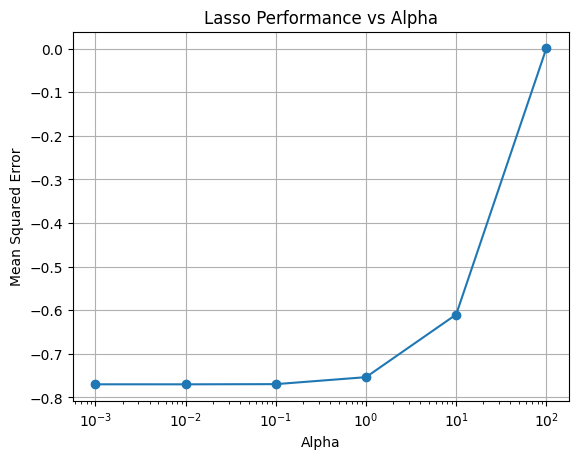

In [ ]:
# We know plot the results to indeed check that alpha=0.1 yields the best lasso
# model

results = grid_search_lasso.cv_results_
alphas = results['param_alpha'].data
scores = results['mean_test_score']

plt.plot(alphas, -scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Performance vs Alpha')
plt.grid(True)
plt.show()


In [ ]:
# Make predictions for the test set
predict_lasso = lasso_best.predict(X_test)

# Show the coefficient and intercept of the model
print(f"Coefficient: {lasso_best.coef_}")
print(f"Intercept: {lasso_best.intercept_}")

Coefficient: [ 13.61586142   4.20373854 -32.87006873  20.46976632  19.6895674
 -11.27689106  -0.80083533   5.88440181  -0.72284884  -9.27398216
 -12.45013398]
Intercept: 109.4374081496326


In [ ]:
r2_model_lasso = r2_score(y_test, predict_lasso)
mae_model_lasso = mean_absolute_error(y_test, predict_lasso)
rmsle_model_lasso = root_mean_squared_log_error(y_test, predict_lasso)

print(f"Errors: \n R2_score: {r2_model_lasso}, \n MAE: {mae_model_lasso},\n RMSLE: {rmsle_model_lasso}")

Errors: 
 R2_score: 0.77589671435856, 
 MAE: 16.62387059473186,
 RMSLE: 0.2323450744275185


Is this model better or worse than the linear regression aforementioned?

In [ ]:
data = {
    "Model": [
        "Simple lineal regression",
        "Lasso lineal regression"
    ],
    "R2": [r2_model_1, r2_model_lasso],
    "MAE": [mae_model_1, mae_model_lasso],
    "RMSLE": [rmsle_model_1, rmsle_model_lasso]
}

df = pd.DataFrame(data)
df.head()

,Model,R2,MAE,RMSLE
0,Simple lineal regression,0.581803,23.671629,0.314517
1,Lasso lineal regression,0.775897,16.623871,0.232345


In light of the results, the Lasso linear regression model is significantly better at predicting pollution than the simple linear regression model. All metrics have improved compared to the previous model.

## Decision Tree Regression

We first train a decision tree model where the criterion for making splits is poisson, the maximum depth of the trees is 10, the minimum number of samples required to make a split is 10, the minimum number of samples required to consider a leaf is 2, and the maximum number of features are all of them.

In [ ]:
# We train the model with the hyperparameters above commented
param_grid2 = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [2, 4, 10],
    'max_features': ['sqrt']
}

tree_regressor = DecisionTreeRegressor()
grid_search_tree = GridSearchCV(tree_regressor, param_grid2, cv=5, n_jobs=-1)
grid_search_tree.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20]})

In [ ]:
# We save the best decision tree regression model
reg_tree = grid_search_tree.best_estimator_

# Results
print("Best parameters:", grid_search_tree.best_params_)
print("Best score (MSE):", grid_search_tree.best_score_)

Best parameters: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10}
Best score (MSE): 0.8191042043576331


Compute the error of the model.

In [ ]:
# Make the predictions for the test set
model_tree_y = reg_tree.predict(X_test)

# Compute the error
r2_tree = r2_score(y_test, model_tree_y)
mae_tree = mean_absolute_error(y_test, model_tree_y)
rmsle_tree = root_mean_squared_log_error(y_test, model_tree_y)

print(f"Errors: \n R2_score: {r2_tree}, \n MAE: {mae_tree},\n RMSLE: {rmsle_tree}")

Errors: 
 R2_score: 0.7924525980161311, 
 MAE: 14.658059151302519,
 RMSLE: 0.19768535471015755


Do we have overfitting?

In [ ]:
# To check if there is overfitting, we perform a comparison between the
# error of the training set and the test set
# Predictions of the training set
model_tree_train = reg_tree.predict(X_train)

# Error of the training set for the decision tree model:
r2_tree_train = r2_score(y_train, model_tree_train)
mae_tree_train = mean_absolute_error(y_train, model_tree_train)
rmsle_tree_train = root_mean_squared_log_error(y_train, model_tree_train)

# Compare them
print(f"R^2 score: Training set: {r2_tree_train} vs. {r2_tree} : Test")
print(f"MAE:       Training set: {mae_tree_train} vs. {mae_tree} : Test")
print(f"RMSLE:     Training set: {rmsle_tree_train} vs. {rmsle_tree} : Test")

R^2 score: Training set: 0.9032126690419888 vs. 0.7924525980161311 : Test
MAE:       Training set: 10.0920122265939 vs. 14.658059151302519 : Test
RMSLE:     Training set: 0.1463480844546445 vs. 0.19768535471015755 : Test


To determine if we have overfitting, meaning that our model does not generalise well, we need to compare the results from the training set with those from the test set. If the test results are worse than the training results, we can conclude that our model is unable to generalize well to unseen cases.

Since the test results are bit worse than the training results (with an increase in MAE and RMSLE and a decrease in R²), we have overfitting.

Is this model better or worse than the linear regression?

In [ ]:
# Results of the regression tree model
tree_data = {
    "Model": ["Regression tree model"],
    "R2": [r2_tree],
    "MAE": [mae_tree],
    "RMSLE": [rmsle_tree]
}

# Dictionary to dataframe
tree_df = pd.DataFrame(tree_data)

# Add the tree_df to our df so that we can do the comparison
df = pd.concat([df, tree_df], ignore_index=True)

df.head()

,Model,R2,MAE,RMSLE
0,Simple lineal regression,0.581803,23.671629,0.314517
1,Lasso lineal regression,0.775897,16.623871,0.232345
2,Regression tree model,0.792453,14.658059,0.197685


This model is better than simple linear regression. However, despite explaining relatively more of the variance in the target variable (by 2%) and improving the Mean Absolute Error (MAE) of multiple linear regression (by 2.8 microg/m³), it is unable to match the results of multiple linear regression when it comes to predicting extreme values. This is reflected in an RMSLE of 0.05 for multiple linear regression compared to an RMSLE of 0.18 for the decision tree, which means that the regression decision tree performs relatively better than linear models overall, but it is less robust against pollution peaks than the multiple linear regression model.

Therefore, among these models, the best one is multiple linear regression.

#### **Comparison**

Based on the EDA performed, the decisions made regarding the data and hyperparameters, and the computational characteristics of your system, which model achieves better regression results?

In [ ]:
df.head()

,Model,R2,MAE,RMSLE
0,Simple lineal regression,0.581803,23.671629,0.314517
1,Lasso lineal regression,0.775897,16.623871,0.232345
2,Regression tree model,0.792453,14.658059,0.197685


In addition to what was discussed in the previous question, it can be said that the model that performs best is the regression tree model. The answer would likely be different if we had handled the anomalous data differently. Also, if the regression tree model had different hyperparameters, the result might have changed. It would be interesting, in this regard, to build a Neural Network model which aims to predict the level of NO$_2$ for a given day.

## Neural Network Model

We build a Neural Network using keras and we compare its performance vs. Lasso regression model vs. Regression tree model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X_train.shape

(7485, 11)

In [ ]:
# the input layer has 64, but we have 11 predictors. This allows the model to
# learn complex representations

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) # output layer is one; yields the value for NO2 level
])

# we compile the nn model
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse', 'msle'])

# we train it. 50 epochs is enough for this notebook (and for comparison
# purposes), but probably the model may be able to learn and not fail in an
# overfitting trap if we allow more epochs.
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 11199.0264 - mae: 93.9613 - mse: 11199.0264 - msle: 8.7014 - val_loss: 2087.6021 - val_mae: 36.6543 - val_mse: 2087.6021 - val_msle: 0.2352
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1569.7808 - mae: 31.5720 - mse: 1569.7808 - msle: 0.1968 - val_loss: 801.4892 - val_mae: 22.9212 - val_mse: 801.4892 - val_msle: 0.1016
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 740.9205 - mae: 21.8226 - mse: 740.9205 - msle: 0.0971 - val_loss: 568.8749 - val_mae: 19.1503 - val_mse: 568.8749 - val_msle: 0.0719
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 551.1023 - mae: 18.4767 - mse: 551.1023 - msle: 0.0710 - val_loss: 468.3113 - val_mae: 17.1158 - val_mse: 468.3113 - val_msle: 0.0570
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 492.3150 - mae: 17.2139 - mse: 492.3150 - msle: 0.0630 - val_loss: 428.4594 - val_mae: 16.1449 - val_mse: 428.4594 - val_msle: 0.0512
Epoch 6/50
234/234 ━━━

We now show how our neural network model looks like.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

For demonstration purposes, we save the weights and biases of all the layers of the neural network.

In [ ]:
input_layer = model.layers[0]
hidden2 = model.layers[1]
hidden3 = model.layers[2]
weights, biases = hidden2.get_weights()

We show the weights and biases for the hidden layer after the training of the NN.

In [ ]:
weights

array([[-5.1147323e-02,  5.9471595e-01, -1.4917748e-01, ...,
         3.4767261e-01,  5.7580340e-01,  2.2537027e-01],
       [ 4.3035161e-01, -3.3589136e-02, -5.4145250e-02, ...,
         3.2668239e-01, -3.8615663e-02,  1.7487259e-01],
       [-7.0745820e-01,  2.7515993e-01,  1.4694390e-01, ...,
         5.3290558e-01,  1.6378613e-01, -3.1081685e-01],
       ...,
       [-1.2126347e+00,  2.6430389e-01, -2.5383074e+00, ...,
         7.7148810e-02,  3.1995344e-01, -1.2388898e+00],
       [-2.3769300e-02,  1.8870045e-01,  7.4383676e-02, ...,
         3.9049894e-01,  3.5511783e-01,  1.1501673e-01],
       [-1.8887462e-01, -1.4146848e-03,  3.9274997e-01, ...,
         2.1656288e-01,  4.1677257e-01, -4.3081897e-01]], dtype=float32)

In [ ]:
biases

array([ 0.13124645,  0.16898221,  0.05393815,  0.18186189,  0.23584443,
       -0.02551932,  0.15471448,  0.09479879,  0.25548634,  0.13573223,
        0.14327958,  0.16347209,  0.17423075,  0.14643227,  0.13913226,
        0.1798192 ,  0.18939263,  0.21591516,  0.25880516,  0.6045307 ,
        0.16167144,  0.1684861 ,  0.16631328,  0.18818383, -0.02569779,
        0.17519231,  0.06661611,  0.14718664,  0.09305366,  0.18914126,
        0.18964997,  0.23024213], dtype=float32)

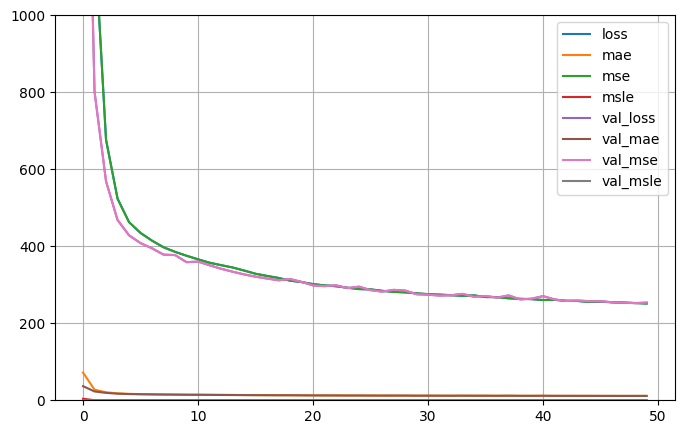

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1000)
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 280.9795 - mae: 11.8185 - mse: 280.9795 - msle: 0.0253


[262.0759582519531,
 11.503440856933594,
 262.0759582519531,
 0.022241991013288498]

In [ ]:
# Save the results
r2_nn = r2_score(y_test, model.predict(X_test))
mae_nn = mean_absolute_error(y_test, model.predict(X_test))
rmsle_nn = root_mean_squared_log_error(y_test, model.predict(X_test))

# Results of the neural network
nn_data = {
    "Model": ["Neural network model"],
    "R2": [r2_nn],
    "MAE": [mae_nn],
    "RMSLE": [rmsle_nn]
}

# Dictionary to dataframe
nn_df = pd.DataFrame(nn_data)

# Add the nn_df to our df so that we can do the comparison
df = pd.concat([df, nn_df], ignore_index=True)

df.head()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Model,R2,MAE,RMSLE
0,Simple lineal regression,0.581803,23.671629,0.314517
1,Lasso lineal regression,0.775897,16.623871,0.232345
2,Regression tree model,0.792453,14.658059,0.197685
3,Neural network model,0.879247,11.503439,0.149137
4,Neural network model,0.883076,11.405929,0.150886


Indeed, the neural network predicts NO$_2$ levels (i.e., the pollution level in this notebook) with higher reliability than the other models. In light of these results, we choose to stick with the neural network model. The neural network model also explains more variance than the other models (regression tree model, lasso lineal regression, simple lineal regression, in that order).